In [81]:
%matplotlib inline

In [32]:
from kid_readout.measurement.io import nc
from kid_readout.analysis.timeseries import bin

In [13]:
save_directory = '/home/flanigan/temp/'

In [3]:
ncf = nc.NCFile('/data/detectors/2016-05-20_172745_sweep_stream_on_off.nc')

In [4]:
ss = [ncf.read(name) for name in ncf.node_names()]

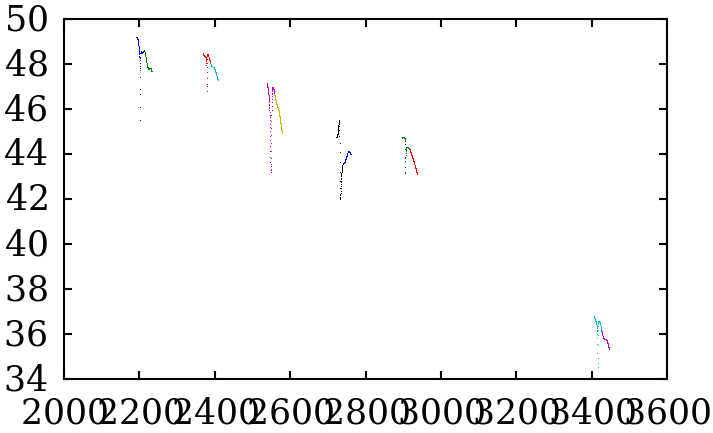

In [8]:
fig, ax = plt.subplots()
for s in ss:
    ax.plot(s[0].sweep.frequency_MHz, 20 * np.log10(np.abs(s[0].sweep.s21_point)), ',')
    ax.plot(s[1].sweep.frequency_MHz, 20 * np.log10(np.abs(s[1].sweep.s21_point)), ',')

In [76]:
# Examine the lowest-frequency resonator
ss0 = ss[0]

In [82]:
s0_on = ss0[0]

In [83]:
ss0[0].stream.frequency_MHz

2201.8779296875

In [84]:
ss0[1].stream.frequency_MHz

2221.8779296875

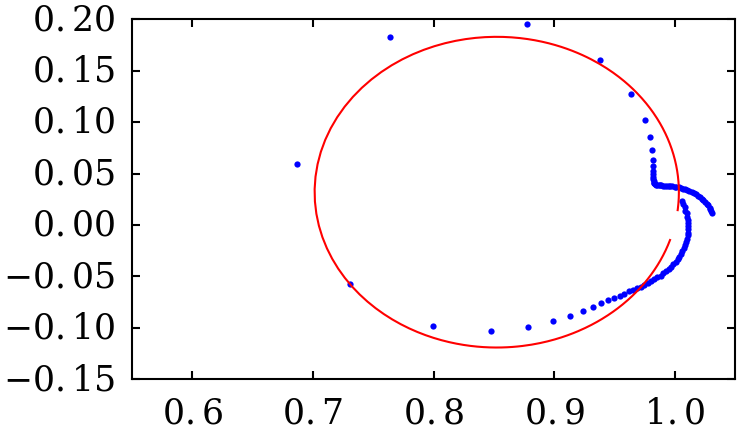

In [85]:
fig, ax = plt.subplots()
ax.set_xlim(0.55, 1.05)
#ax.set_ylim(-0.2, 0.2)
ax.plot(s0_on.sweep.s21_normalized.real, s0_on.sweep.s21_normalized.imag, '.')
f_model = np.linspace(s0_on.sweep.frequency.min(), s0_on.sweep.frequency.max(), 1000)
model = s0_on.sweep.resonator.remove_background(f_model, s0_on.sweep.resonator.model.eval(params=s0_on.sweep.resonator.current_params, f=f_model))
ax.plot(model.real, model.imag, '-r')

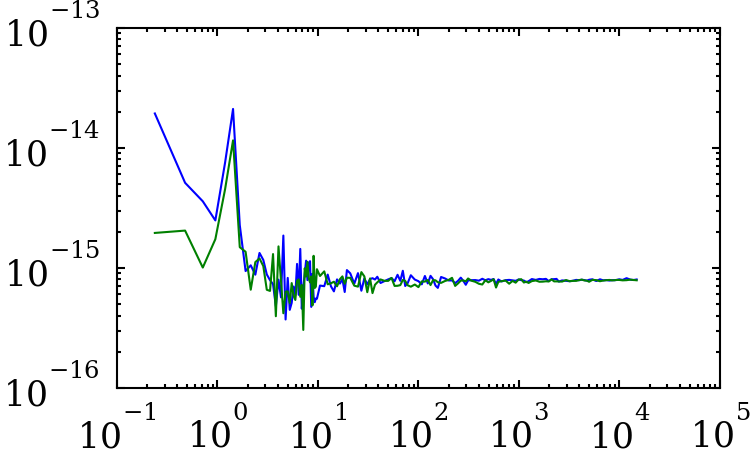

In [86]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(s0_on.S_frequency, s0_on.S_xx, '-')
ax.plot(s0_on.S_frequency, s0_on.S_yy, '-')

In [36]:
nfft = int(2**(np.floor(np.log2(s0_on.stream.s21_raw.size)) - 3))
s21r_on, fs21_on = plt.mlab.psd(s0_on.stream.s21_raw.real, Fs=s0_on.stream.stream_sample_rate, NFFT=nfft)
s21i_on, fs21_on = plt.mlab.psd(s0_on.stream.s21_raw.imag, Fs=s0_on.stream.stream_sample_rate, NFFT=nfft)
fs21_on_binned, s21r_on_binned = bin.log_bin(fs21_on[1:-1], s21r_on[1:-1])
fs21_on_binned, s21i_on_binned = bin.log_bin(fs21_on[1:-1], s21i_on[1:-1])

s0_off = ss0[1]
nfft = int(2**(np.floor(np.log2(s0_off.stream.s21_raw.size)) - 3))
s21r_off, fs21_off = plt.mlab.psd(s0_off.stream.s21_raw.real, Fs=s0_off.stream.stream_sample_rate, NFFT=nfft)
s21i_off, fs21_off = plt.mlab.psd(s0_off.stream.s21_raw.imag, Fs=s0_off.stream.stream_sample_rate, NFFT=nfft)
fs21_off_binned, s21r_off_binned = bin.log_bin(fs21_off[1:-1], s21r_off[1:-1])
fs21_off_binned, s21i_off_binned = bin.log_bin(fs21_off[1:-1], s21i_off[1:-1])

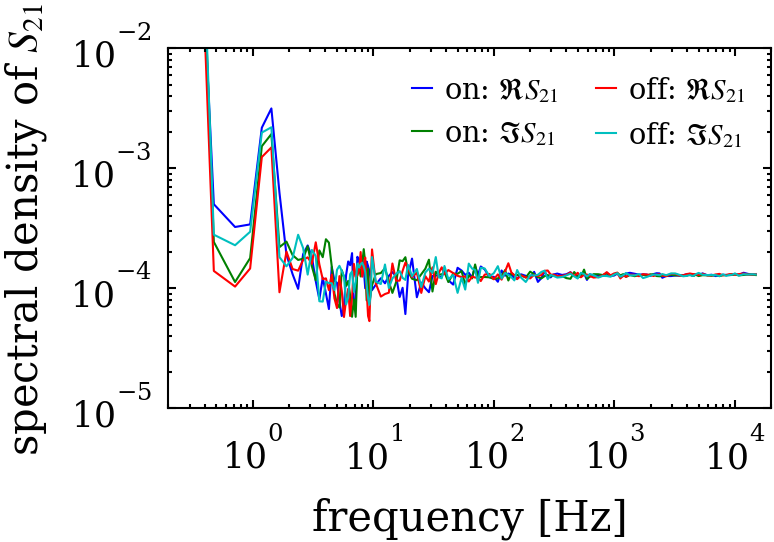

In [37]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density of $S_{21}$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(2e-1, 2e4)
ax.set_ylim(1e-5, 1e-2)

ax.plot(fs21_on_binned, s21r_on_binned, label=r'on: $\Re S_{21}$')
ax.plot(fs21_on_binned, s21i_on_binned, label=r'on: $\Im S_{21}$')
ax.plot(fs21_off_binned, s21r_off_binned, label=r'off: $\Re S_{21}$')
ax.plot(fs21_off_binned, s21i_off_binned, label=r'off: $\Im S_{21}$')

ax.legend(loc='best', ncol=2, fontsize='xx-small')

#fig.savefig(save_directory + 'simultaneous_on_and_off_psd_of_S21.pdf')